In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("synthetic_agricultural_data.csv")
data

,Temperature_C,Rainfall_mm,Humidity_%,Soil_pH,Sunshine_hours,Fertilizer_kg_per_hectare,Pesticide_kg_per_hectare,Crop_Yield_tonnes_per_hectare
0,22.490802,224.540429,41.107976,6.538164,6.093645,174.127838,7.054327,4.292156
1,34.014286,184.024092,62.514057,6.458364,5.975830,164.679169,8.170133,8.421122
2,29.639879,127.381904,82.376750,5.551284,11.250037,136.029343,3.254211,9.977903
3,26.973170,253.448755,73.933493,6.182496,5.996370,193.407072,6.623867,2.240208
4,18.120373,221.182793,78.393669,6.260391,6.175598,80.071177,6.145714,9.178927
...,...,...,...,...,...,...,...,...
495,22.067045,72.895518,70.092768,6.813910,7.938604,179.794364,2.901086,5.536856
496,26.673122,279.328394,67.169421,7.413229,8.618232,73.590981,8.766971,4.675209
497,16.554693,84.204658,57.809643,5.637916,10.924617,96.468179,8.974841,5.156579
498,34.487896,287.559338,52.787147,5.614109,11.845915,93.506830,2.769882,6.239525


In [3]:
features = [
    "Temperature_C",
    "Rainfall_mm",
    "Humidity_%",
    "Soil_pH",
    "Sunshine_hours",
    "Fertilizer_kg_per_hectare",
    "Pesticide_kg_per_hectare",
]
X = data[features]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
inertia = []
range_clusters = range(2, 10)  # Testing between 2 and 9 clusters
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

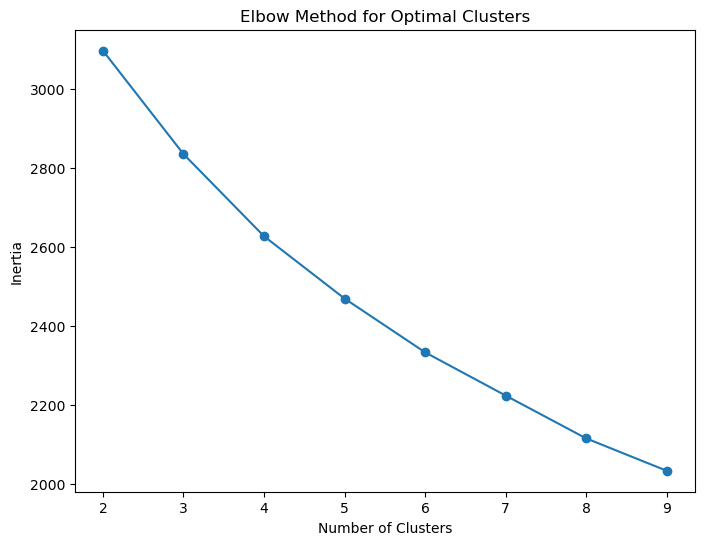

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [7]:
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)


C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [8]:
data["Cluster"] = kmeans.labels_


In [9]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans.labels_)

In [10]:
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")


Silhouette Score: 0.1073
Calinski-Harabasz Index: 58.1802


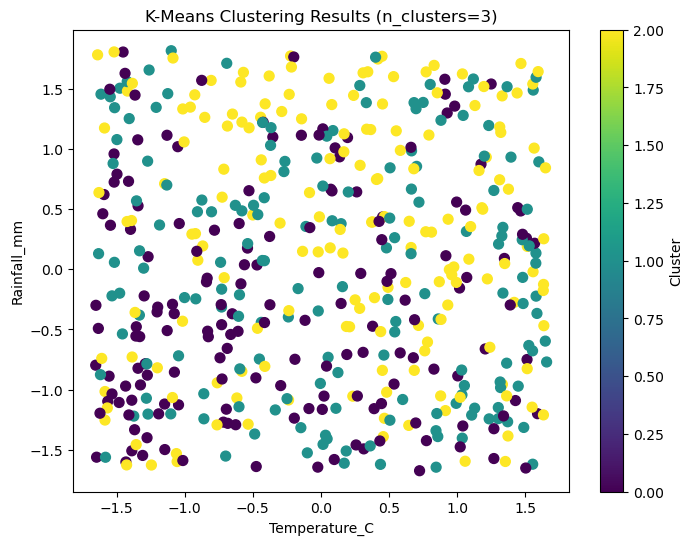

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title(f"K-Means Clustering Results (n_clusters={optimal_clusters})")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar(label="Cluster")
plt.show()
